In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import os
%matplotlib inline

In [2]:
# Set working directory
os.chdir("C:\Users\Emmet\Documents\Data Analysis")
os.getcwd()

'C:\\Users\\Emmet\\Documents\\Data Analysis'

In [3]:
# Reading the dataset using Pandas
movies = pd.read_csv("input/dir1/movies.csv")  
ratings = pd.read_csv("input/dir1/ratings.csv")

In [4]:
# Create seperate columns for title and year
movies['title'] = movies.title.str.strip()
years = movies.title.str[-5:-1]
titles = movies.title.str[:-6]
movies['year'] = years
movies['title'] = titles
# Rearrange column order
movies = movies[['movieId', 'title', 'year', 'genres']]
# Remove nonnumeric rows
movies = movies[pd.to_numeric(movies['year'], errors='coerce').notnull()]
movies[['year']] = movies[['year']].astype(int)

In [5]:
# Drop timestamp column as it is not useful
ratings = ratings.drop('timestamp', axis=1)   
# Drop columns with nans
movies = movies.dropna(axis=1, how='all') 
ratings = ratings.dropna(axis=1, how='all')

In [6]:
movies.head(10)

,movieId,title,year,genres
0,1,Toy Story,1995,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,1995,Adventure|Children|Fantasy
2,3,Grumpier Old Men,1995,Comedy|Romance
3,4,Waiting to Exhale,1995,Comedy|Drama|Romance
4,5,Father of the Bride Part II,1995,Comedy
5,6,Heat,1995,Action|Crime|Thriller
6,7,Sabrina,1995,Comedy|Romance
7,8,Tom and Huck,1995,Adventure|Children
8,9,Sudden Death,1995,Action
9,10,GoldenEye,1995,Action|Adventure|Thriller


In [7]:
ratings.head(10)

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
5,1,1263,2.0
6,1,1287,2.0
7,1,1293,2.0
8,1,1339,3.5
9,1,1343,2.0


In [8]:
# Join the dataframes
joinData = pd.merge(ratings, movies, on='movieId', how='left')
joinData = joinData[joinData.year.notnull()]
# Convert datatype of year from float to integer
joinData[['year']] = joinData[['year']].astype(int)
# Strip any whitespace from title
joinData['title'] = joinData['title'].str.strip()
joinData.head(10)

,userId,movieId,rating,title,year,genres
0,1,31,2.5,Dangerous Minds,1995,Drama
1,1,1029,3.0,Dumbo,1941,Animation|Children|Drama|Musical
2,1,1061,3.0,Sleepers,1996,Thriller
3,1,1129,2.0,Escape from New York,1981,Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso),1989,Drama
5,1,1263,2.0,"Deer Hunter, The",1978,Drama|War
6,1,1287,2.0,Ben-Hur,1959,Action|Adventure|Drama
7,1,1293,2.0,Gandhi,1982,Drama
8,1,1339,3.5,Dracula (Bram Stoker's Dracula),1992,Fantasy|Horror|Romance|Thriller
9,1,1343,2.0,Cape Fear,1991,Thriller


In [9]:
# Summary statistics
joinData['year'].describe().astype(int)

count    100000
mean       1991
std          15
min        1902
25%        1987
50%        1995
75%        2001
max        2016
Name: year, dtype: int32

In [10]:
joinData['rating'].describe()

count    100000.000000
mean          3.543610
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [11]:
# Bins for each rating
bins = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
# Names of each bin
rating_score = ['Poor', 'Bad', 'Okay', 'Good', 'Excellent']
# Place each rating in the appropriate bin
categories = pd.cut(ratings['rating'], bins, labels = rating_score)
ratings['category'] = categories
ratings.head(10)

,userId,movieId,rating,category
0,1,31,2.5,Okay
1,1,1029,3.0,Okay
2,1,1061,3.0,Okay
3,1,1129,2.0,Bad
4,1,1172,4.0,Good
5,1,1263,2.0,Bad
6,1,1287,2.0,Bad
7,1,1293,2.0,Bad
8,1,1339,3.5,Good
9,1,1343,2.0,Bad


In [12]:
ratingTotals = ratings['category'].value_counts()
# List the indexes
list(ratingTotals.index)

['Good', 'Okay', 'Excellent', 'Bad', 'Poor']

In [13]:
# List the values
list(ratingTotals)

[39288, 24513, 22818, 8958, 4427]

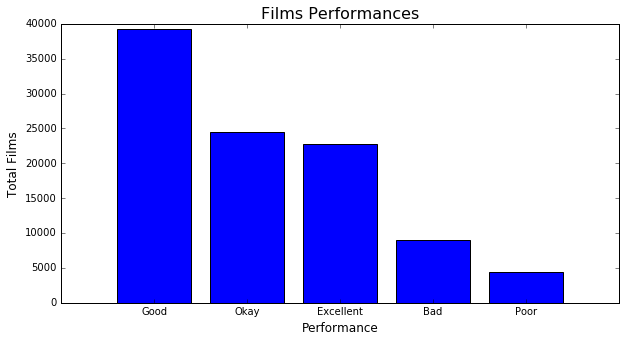

In [14]:
# Plot the total number of films for each category
plt.figure(figsize=(10,5))
plt.bar(range(len(ratingTotals)), list(ratingTotals), align = 'center')
plt.xticks(range(len(ratingTotals)), list(ratingTotals.index), fontsize = 10)
plt.xlabel("Performance", fontsize = 12)
plt.ylabel("Total Films", fontsize = 12)
plt.title("Films Performances", fontsize = 16)
plt.show()

In [15]:
genres = movies['genres']
# Split genres into a list
genres = genres.str.split('|')
list_genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy', 'FilmNoir',
               'Horror','Musical','Mystery','Romance','SciFi','Thriller','War','Western']
# Dictionary to store the total count for each genres
all_genres = { }
# Loop through genres and count occurrences
for genre in genres:    
    for g in genre:
        if g in list_genres:
            if g not in all_genres:
                all_genres[g] = 1
            else:
                all_genres[g] = all_genres[g] + 1

print(all_genres)

{'Mystery': 543, 'Drama': 4364, 'Horror': 877, 'Crime': 1100, 'Romance': 1545, 'Fantasy': 654, 'Musical': 394, 'Animation': 447, 'War': 367, 'Adventure': 1117, 'Action': 1545, 'Comedy': 3314, 'Documentary': 494, 'Children': 583, 'Thriller': 1729, 'Western': 168}


In [16]:
# Sort by keys
for key in sorted(all_genres.iterkeys()):
    print "%s: %s" % (key, all_genres[key])

Action: 1545
Adventure: 1117
Animation: 447
Children: 583
Comedy: 3314
Crime: 1100
Documentary: 494
Drama: 4364
Fantasy: 654
Horror: 877
Musical: 394
Mystery: 543
Romance: 1545
Thriller: 1729
War: 367
Western: 168


In [17]:
# Sort by values
for key, value in sorted(all_genres.iteritems(), key = lambda (k,v): (v,k), reverse = True):
    print "%s: %s" % (key, value)

Drama: 4364
Comedy: 3314
Thriller: 1729
Romance: 1545
Action: 1545
Adventure: 1117
Crime: 1100
Horror: 877
Fantasy: 654
Children: 583
Mystery: 543
Documentary: 494
Animation: 447
Musical: 394
War: 367
Western: 168


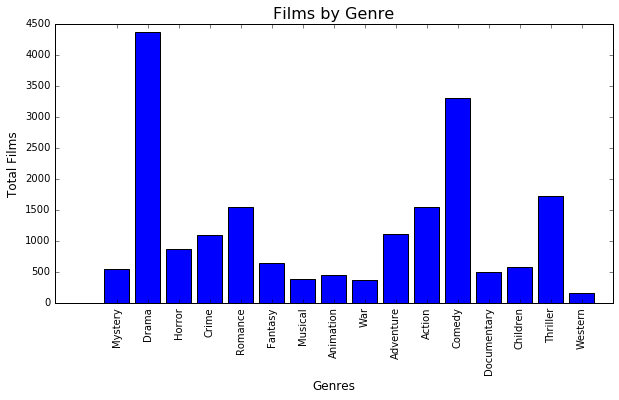

In [18]:
# Plot the total number of films for each genre
plt.figure(figsize=(10,5))
plt.bar(range(len(all_genres)), list(all_genres.values()), align = 'center')
plt.xticks(range(len(all_genres)), list(all_genres.keys()), rotation = 'vertical', fontsize = 10)
plt.xlabel("Genres", fontsize = 12)
plt.ylabel("Total Films", fontsize = 12)
plt.title("Films by Genre", fontsize = 16)
plt.show()

In [19]:
years = movies['year']
# Dictionary to store the total count for each year
all_years = { }
# Loop through years and count occurrences
for year in years:    
    if year not in all_years:
        all_years[year] = 1
    else:
        all_years[year] = all_years[year] + 1

print(all_years)

{1902: 1, 1915: 1, 1916: 2, 1917: 1, 1918: 1, 1919: 1, 1920: 3, 1921: 5, 1922: 6, 1923: 3, 1924: 5, 1925: 8, 1926: 6, 1927: 8, 1928: 5, 1929: 7, 1930: 5, 1931: 14, 1932: 14, 1933: 13, 1934: 14, 1935: 11, 1936: 18, 1937: 20, 1938: 14, 1939: 26, 1940: 23, 1941: 21, 1942: 28, 1943: 21, 1944: 22, 1945: 25, 1946: 26, 1947: 32, 1948: 26, 1949: 27, 1950: 27, 1951: 23, 1952: 27, 1953: 36, 1954: 33, 1955: 49, 1956: 32, 1957: 41, 1958: 31, 1959: 41, 1960: 45, 1961: 36, 1962: 41, 1963: 47, 1964: 45, 1965: 43, 1966: 48, 1967: 53, 1968: 45, 1969: 40, 1970: 43, 1971: 55, 1972: 48, 1973: 51, 1974: 57, 1975: 50, 1976: 51, 1977: 61, 1978: 62, 1979: 73, 1980: 97, 1981: 99, 1982: 102, 1983: 81, 1984: 99, 1985: 125, 1986: 130, 1987: 152, 1988: 164, 1989: 147, 1990: 142, 1991: 137, 1992: 149, 1993: 198, 1994: 240, 1995: 266, 1996: 275, 1997: 267, 1998: 272, 1999: 261, 2000: 273, 2001: 267, 2002: 272, 2003: 238, 2004: 247, 2005: 233, 2006: 261, 2007: 255, 2008: 247, 2009: 255, 2010: 228, 2011: 230, 2012: 22

In [20]:
# Sort by keys
for key in sorted(all_years.iterkeys()):
    print "%s: %s" % (key, all_years[key])

1902: 1
1915: 1
1916: 2
1917: 1
1918: 1
1919: 1
1920: 3
1921: 5
1922: 6
1923: 3
1924: 5
1925: 8
1926: 6
1927: 8
1928: 5
1929: 7
1930: 5
1931: 14
1932: 14
1933: 13
1934: 14
1935: 11
1936: 18
1937: 20
1938: 14
1939: 26
1940: 23
1941: 21
1942: 28
1943: 21
1944: 22
1945: 25
1946: 26
1947: 32
1948: 26
1949: 27
1950: 27
1951: 23
1952: 27
1953: 36
1954: 33
1955: 49
1956: 32
1957: 41
1958: 31
1959: 41
1960: 45
1961: 36
1962: 41
1963: 47
1964: 45
1965: 43
1966: 48
1967: 53
1968: 45
1969: 40
1970: 43
1971: 55
1972: 48
1973: 51
1974: 57
1975: 50
1976: 51
1977: 61
1978: 62
1979: 73
1980: 97
1981: 99
1982: 102
1983: 81
1984: 99
1985: 125
1986: 130
1987: 152
1988: 164
1989: 147
1990: 142
1991: 137
1992: 149
1993: 198
1994: 240
1995: 266
1996: 275
1997: 267
1998: 272
1999: 261
2000: 273
2001: 267
2002: 272
2003: 238
2004: 247
2005: 233
2006: 261
2007: 255
2008: 247
2009: 255
2010: 228
2011: 230
2012: 222
2013: 224
2014: 221
2015: 182
2016: 65


In [21]:
# Sort by values
for key, value in sorted(all_years.iteritems(), key = lambda (k,v): (v,k), reverse = True):
    print "%s: %s" % (key, value)  

1996: 275
2000: 273
2002: 272
1998: 272
2001: 267
1997: 267
1995: 266
2006: 261
1999: 261
2009: 255
2007: 255
2008: 247
2004: 247
1994: 240
2003: 238
2005: 233
2011: 230
2010: 228
2013: 224
2012: 222
2014: 221
1993: 198
2015: 182
1988: 164
1987: 152
1992: 149
1989: 147
1990: 142
1991: 137
1986: 130
1985: 125
1982: 102
1984: 99
1981: 99
1980: 97
1983: 81
1979: 73
2016: 65
1978: 62
1977: 61
1974: 57
1971: 55
1967: 53
1976: 51
1973: 51
1975: 50
1955: 49
1972: 48
1966: 48
1963: 47
1968: 45
1964: 45
1960: 45
1970: 43
1965: 43
1962: 41
1959: 41
1957: 41
1969: 40
1961: 36
1953: 36
1954: 33
1956: 32
1947: 32
1958: 31
1942: 28
1952: 27
1950: 27
1949: 27
1948: 26
1946: 26
1939: 26
1945: 25
1951: 23
1940: 23
1944: 22
1943: 21
1941: 21
1937: 20
1936: 18
1938: 14
1934: 14
1932: 14
1931: 14
1933: 13
1935: 11
1927: 8
1925: 8
1929: 7
1926: 6
1922: 6
1930: 5
1928: 5
1924: 5
1921: 5
1923: 3
1920: 3
1916: 2
1919: 1
1918: 1
1917: 1
1915: 1
1902: 1


In [22]:
yearRatings = joinData[['year', 'rating']]
yearRatings[['year']] = yearRatings[['year']]
# Get the number of occurences for each year
yearCounts = yearRatings.groupby(['year'], as_index = False).count()
# Get the average rating for each year
yearRatings = yearRatings.groupby(['year'], as_index = False).mean()
# Create new column for average rating
yearRatings.loc[:, 'count'] = yearCounts.loc[:, 'rating']
yearRatings = yearRatings[(yearRatings['year'] >= 1950) & (yearRatings['year'] <= 2015)]
yearRatings

C:\Users\Emmet\AppData\Roaming\Python\Python27\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,year,rating,count
36,1950,3.915254,236
37,1951,3.983539,243
38,1952,4.000000,152
39,1953,3.754587,218
40,1954,3.994220,346
41,1955,3.751724,290
42,1956,3.617647,170
43,1957,4.014241,316
44,1958,3.823171,246
45,1959,3.841033,368


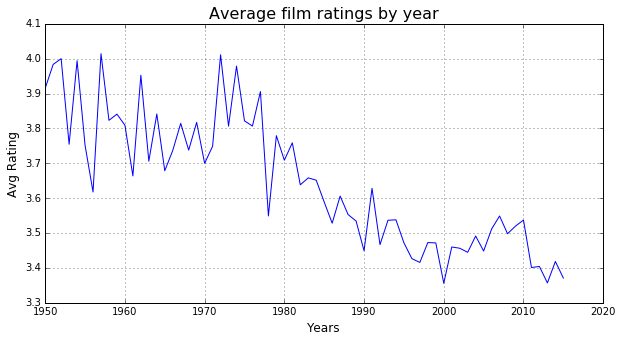

In [23]:
# Plot the average film rating by year
plt.figure(figsize=(10,5))
plt.plot(yearRatings['year'], yearRatings['rating'])
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Avg Rating', fontsize = 12)
plt.title('Average film rating by year', fontsize = 16)
plt.grid(True)
plt.show()

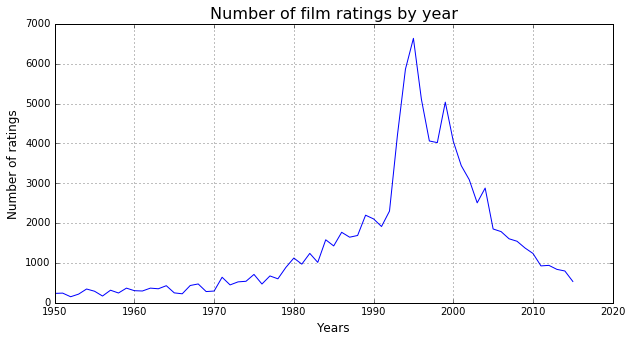

In [24]:
# Plot the number of films ratings by year
plt.figure(figsize=(10,5))
plt.plot(yearRatings['year'], yearRatings['count'])
plt.xlabel('Years', fontsize = 12)
plt.ylabel('Number of ratings', fontsize = 12)
plt.title('Number of film ratings by year', fontsize = 16)
plt.grid(True)
plt.show()

In [25]:
movieRatings = joinData[['title', 'rating']]
# Get average rating for each film
avgRatings = movieRatings.groupby(['title'], as_index = False).mean()
# Get the number of ratings for each film
numRatings = movieRatings.groupby(['title'], as_index = False).count()
avgRatings.columns = ['title', 'rating']
numRatings.columns = ['title', 'count']
numRatings.sort_values(['count'], ascending = False).head(10)

,title,count
2863,Forrest Gump,341
6212,Pulp Fiction,324
6887,"Shawshank Redemption, The",311
6969,"Silence of the Lambs, The",304
7286,Star Wars: Episode IV - A New Hope,291
4187,Jurassic Park,274
4963,"Matrix, The",259
8032,Toy Story,247
6723,Schindler's List,244
7650,Terminator 2: Judgment Day,237


In [26]:
movieData = pd.merge(avgRatings, numRatings, on='title', how='left' )
# Include only movies with 100 or more reviews and an average rating of 4 or more
greatMovies = movieData[(movieData['count'] >= 100) & (movieData['rating'] >= 4)].sort_values(['rating'], ascending = False)
greatMovies.head(10)

,title,rating,count
3159,"Godfather, The",4.487500,200
6887,"Shawshank Redemption, The",4.487138,311
3160,"Godfather: Part II, The",4.385185,135
8268,"Usual Suspects, The",4.370647,201
6723,Schindler's List,4.303279,244
5700,One Flew Over the Cuckoo's Nest,4.256944,144
2658,Fargo,4.256696,224
6212,Pulp Fiction,4.256173,324
351,American Beauty,4.236364,220
1948,"Dark Knight, The",4.235537,121


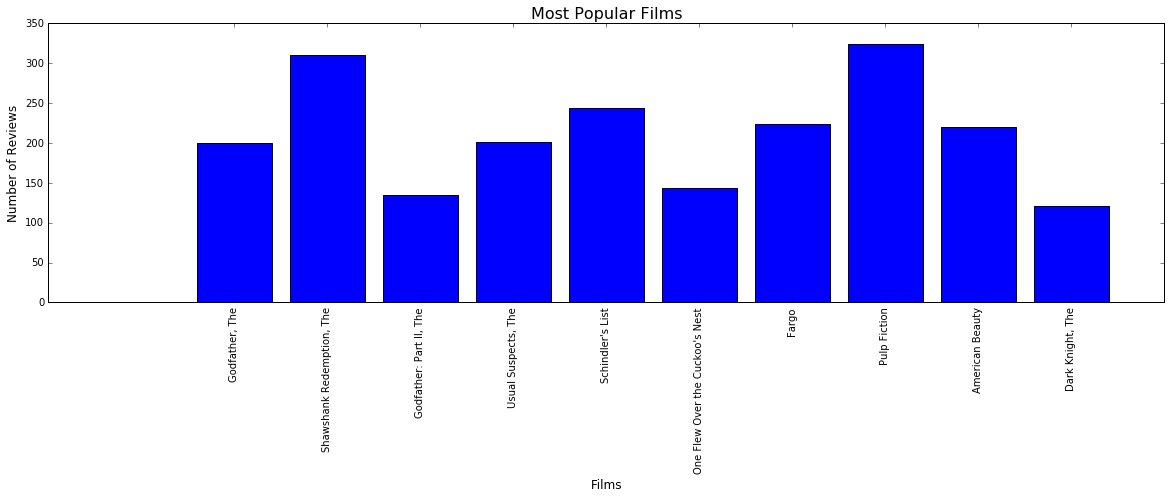

In [27]:
# Plot the 10 highest rated films according to the number of reviews
t = greatMovies['title'].head(10)
r = np.array(greatMovies['count'].head(10))
plt.figure(figsize=(20,5))
plt.bar(range(len(t)), r , align = 'center')
plt.xticks(range(len(t)), t, rotation = 'vertical', fontsize = 10)
plt.xlabel("Films", fontsize = 12)
plt.ylabel("Number of Reviews", fontsize = 12)
plt.title("Most Popular Films", fontsize = 16)
plt.show()